# Latihan: Studi Kasus Feature Engineering

## Import Library

In [1]:
import sys
print(sys.executable)


/home/nadia/.local/share/virtualenvs/FeatureEngineering-qOEirD7i/bin/python


In [37]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

## Make Dummy Dataset

In [3]:
X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2,n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)

In [4]:
print("X\n", X)
print("y\n", y)

X
 [[ 9.33026426e-02 -3.47251979e+00 -1.31419890e+00 ... -1.02459207e+00
   1.00555885e+00 -2.76557861e-01]
 [-1.89573695e-01 -1.77084229e+00 -1.57885053e+00 ... -1.98370123e-03
  -2.43630056e-01  2.85979217e-01]
 [ 9.16269199e-01 -2.05177014e+00  3.63199796e+00 ... -3.17536049e+00
   2.48602025e+00 -2.86729088e+00]
 ...
 [ 1.20196663e+00 -1.26341689e+00 -1.33192514e+00 ...  5.10348428e+00
   6.72599595e-02  9.31995080e-01]
 [-2.12784572e+00 -9.75838476e-01  2.79144126e-01 ... -1.19370833e+00
  -1.28774255e-01  8.00834288e-01]
 [ 6.12706286e-01  1.38766694e+00 -5.55457779e+00 ...  1.58390854e+00
  -5.83111477e-01  2.51130869e+00]]
y
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Buat Dataset

In [5]:
df = pd.DataFrame(X, columns=[f'Fitur_{i}' for i in range(1,16)])
df['Target'] = y
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fitur_1   1000 non-null   float64
 1   Fitur_2   1000 non-null   float64
 2   Fitur_3   1000 non-null   float64
 3   Fitur_4   1000 non-null   float64
 4   Fitur_5   1000 non-null   float64
 5   Fitur_6   1000 non-null   float64
 6   Fitur_7   1000 non-null   float64
 7   Fitur_8   1000 non-null   float64
 8   Fitur_9   1000 non-null   float64
 9   Fitur_10  1000 non-null   float64
 10  Fitur_11  1000 non-null   float64
 11  Fitur_12  1000 non-null   float64
 12  Fitur_13  1000 non-null   float64
 13  Fitur_14  1000 non-null   float64
 14  Fitur_15  1000 non-null   float64
 15  Target    1000 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 125.1 KB


,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,1.459826,-1.024592,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,2.236310,-0.001984,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,0.671318,-3.175360,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,0.776033,-0.494986,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,3.038337,-0.391516,0.712335,2.810524,0


In [6]:
df['Fitur_12'] = np.random.choice(['A','B','C'], size=1000)
df['Fitur_13'] = np.random.choice(['X','Y','Z'], size=1000)

df

,Fitur_1,Fitur_2,Fitur_3,Fitur_4,Fitur_5,Fitur_6,Fitur_7,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_12,Fitur_13,Fitur_14,Fitur_15,Target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,A,Z,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,A,Z,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,B,Y,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,A,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,C,Z,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,A,Z,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,B,X,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,B,Y,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,B,Y,-0.128774,0.800834,0


In [7]:
X = df.drop('Target', axis=1)
y = df['Target']

In [8]:
print("Distribusi kelas sebelum SMOTE", Counter(y))

Distribusi kelas sebelum SMOTE Counter({0: 901, 1: 99})


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fitur_1   1000 non-null   float64
 1   Fitur_2   1000 non-null   float64
 2   Fitur_3   1000 non-null   float64
 3   Fitur_4   1000 non-null   float64
 4   Fitur_5   1000 non-null   float64
 5   Fitur_6   1000 non-null   float64
 6   Fitur_7   1000 non-null   float64
 7   Fitur_8   1000 non-null   float64
 8   Fitur_9   1000 non-null   float64
 9   Fitur_10  1000 non-null   float64
 10  Fitur_11  1000 non-null   float64
 11  Fitur_12  1000 non-null   object 
 12  Fitur_13  1000 non-null   object 
 13  Fitur_14  1000 non-null   float64
 14  Fitur_15  1000 non-null   float64
 15  Target    1000 non-null   int64  
dtypes: float64(13), int64(1), object(2)
memory usage: 125.1+ KB


## Feature Selection

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = X.drop(['Fitur_12', 'Fitur_13'],axis=1)

rf_model.fit(X_integer,y)

importances = rf_model.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
for i, importance in enumerate(importances):
    print(f'{i}: {importance}')

print(indices)

[0.02849415 0.1186002  0.06878604 0.03692007 0.07731131 0.02854432
 0.03092131 0.05048266 0.26250494 0.0895826  0.06365231 0.01841848
 0.12578162]
0: 0.028494147542260477
1: 0.11860019897866206
2: 0.06878603593465271
3: 0.03692007281962625
4: 0.07731131335837178
5: 0.028544322634752886
6: 0.030921307286296183
7: 0.050482655781999855
8: 0.2625049418105367
9: 0.08958259568334655
10: 0.06365230544114515
11: 0.01841848412165848
12: 0.12578161860669113
[ 8 12  1  9  4  2 10  7  3  6  5  0 11]


In [11]:
treshold = 0.05
important_features_indices = [i for i in range(len(importances)) if importances[i] >= treshold]

print(important_features_indices)

[1, 2, 4, 7, 8, 9, 10, 12]


In [12]:
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")

for i in important_features_indices:
    print(f"{X.columns[i]}: {importances[i]}")

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
Fitur_2: 0.11860019897866206
Fitur_3: 0.06878603593465271
Fitur_5: 0.07731131335837178
Fitur_8: 0.050482655781999855
Fitur_9: 0.2625049418105367
Fitur_10: 0.08958259568334655
Fitur_11: 0.06365230544114515
Fitur_13: 0.12578161860669113


In [13]:
important_features = X_integer.columns[important_features_indices]
# print(important_features)

X_important = X_integer[important_features]

print("\nDimensi data pelatihan dengan fitur penting:", X_important.shape)


Dimensi data pelatihan dengan fitur penting: (1000, 8)


In [14]:
X_Selected = pd.concat([X_important, X['Fitur_12']], axis=1)
X_Selected = pd.concat([X_Selected, X['Fitur_13']], axis=1)
X_Selected

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,A,Z
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,A,Z
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,B,Y
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,A,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,C,Z
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,A,Z
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,B,X
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,B,Y
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,B,Y


## Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_Selected['Fitur_12'] = label_encoder.fit_transform(X_Selected['Fitur_12'])
# print(label_encoder.inverse_transform(X_Selected[['Fitur_12']]))
X_Selected['Fitur_13'] = label_encoder.fit_transform(X_Selected['Fitur_13'])

X_Selected

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15,Fitur_12,Fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,0,2
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,0,2
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,1,1
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,0,0
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,2,2
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,0,2
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,1,0
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,1,1
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,1,1


## Mengatasi Outlier

In [16]:
X_Selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fitur_2   1000 non-null   float64
 1   Fitur_3   1000 non-null   float64
 2   Fitur_5   1000 non-null   float64
 3   Fitur_8   1000 non-null   float64
 4   Fitur_9   1000 non-null   float64
 5   Fitur_10  1000 non-null   float64
 6   Fitur_11  1000 non-null   float64
 7   Fitur_15  1000 non-null   float64
 8   Fitur_12  1000 non-null   int64  
 9   Fitur_13  1000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 78.3 KB


In [17]:
numeric_columns = X_Selected.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop(['Fitur_12', 'Fitur_13'])
print(numeric_columns)

X_cleaned = X_important.copy()

Index(['Fitur_2', 'Fitur_3', 'Fitur_5', 'Fitur_8', 'Fitur_9', 'Fitur_10',
       'Fitur_11', 'Fitur_15'],
      dtype='object')


In [18]:
for col in numeric_columns:
    Q1 = X_important[col].quantile(0.25)
    Q3 = X_important[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outliers = X_cleaned[(X_cleaned[col] < lower_bound) | (X_cleaned[col] > upper_bound)]
    # print(outliers)

    X_cleaned = X_cleaned.drop(outliers.index, axis=0)

In [19]:
X_important

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


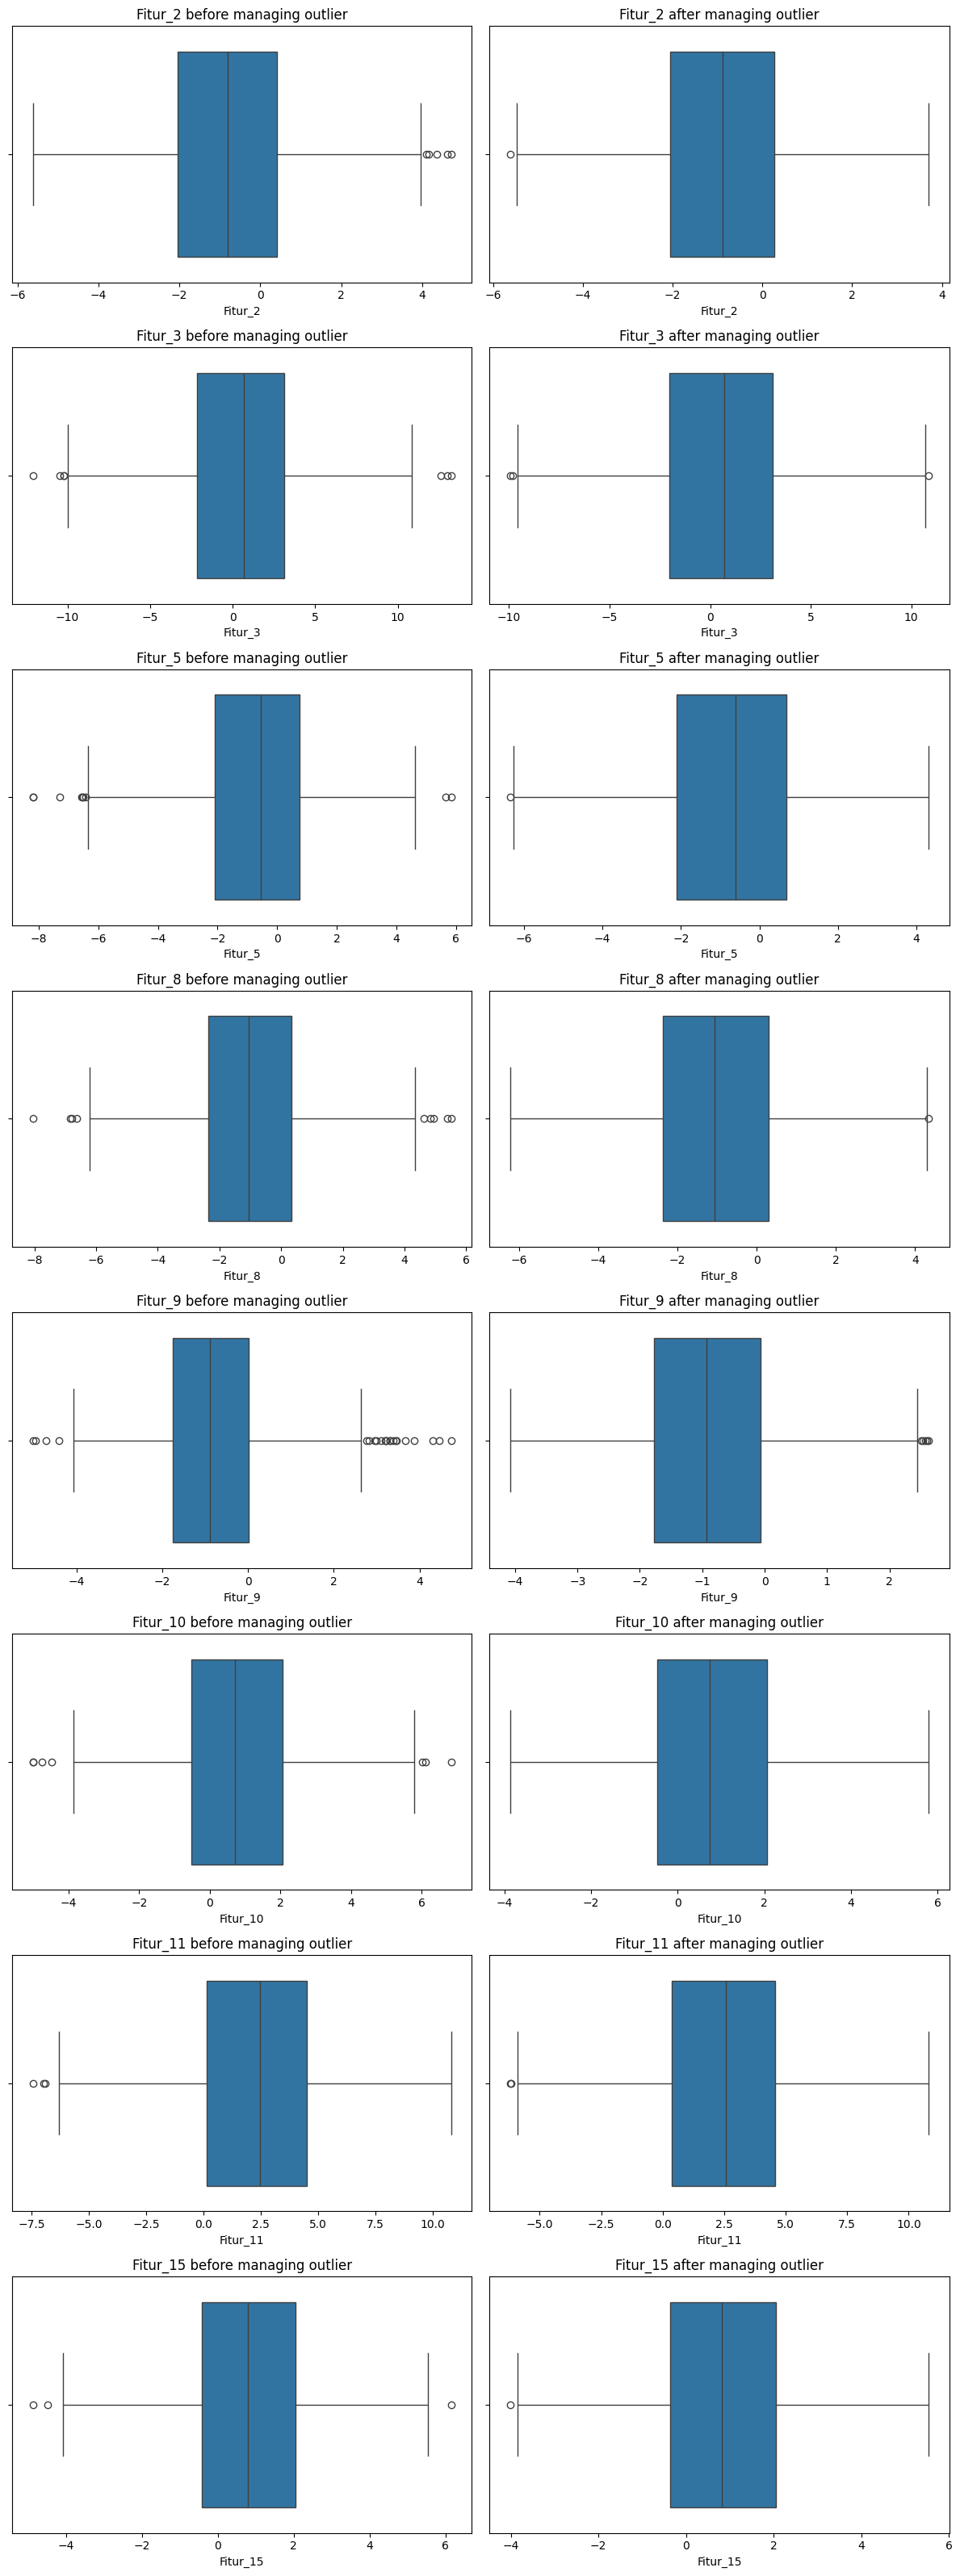

In [20]:
fix, ax = plt.subplots(len(numeric_columns),2, figsize=(12,4*len(numeric_columns)))


for row, col in enumerate(numeric_columns):
    sns.boxplot(x=X_important[col], ax=ax[row,0])
    ax[row,0].set_title(f"{col} before managing outlier")
    
    sns.boxplot(x=X_cleaned[col], ax=ax[row,1])
    ax[row,1].set_title(f"{col} after managing outlier")

plt.tight_layout()
plt.show()


In [21]:
X_cleaned.shape

(949, 8)

## Teknik SMOTE

In [27]:
y = y.drop(outliers.index)

In [29]:
print("Distribusi kelas setelah SMOTE:", Counter(y))

Distribusi kelas setelah SMOTE: Counter({0: 901, 1: 99})


In [32]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_cleaned,y[:len(X_cleaned)])

print("Distribusi kelas setelah SMOTE:", Counter(y_resampled))


Distribusi kelas setelah SMOTE: Counter({0: 854, 1: 854})


In [33]:
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled,name='Target')

In [34]:
X_resampled

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
1703,0.258336,-1.267328,-2.773781,-0.273711,-1.045035,4.294157,1.067803,1.324770
1704,0.746857,-1.171206,-0.910866,1.161651,0.234293,2.957672,-0.708739,1.221229
1705,-3.749813,-8.905575,-5.321001,-3.946812,0.172925,2.991405,4.195097,2.453443
1706,-2.500805,3.416311,1.492874,-1.555608,-2.145866,-0.476960,1.892889,-1.427778


In [35]:
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
1703    1
1704    1
1705    1
1706    1
1707    1
Name: Target, Length: 1708, dtype: int64

## Visualisasi distribusi data

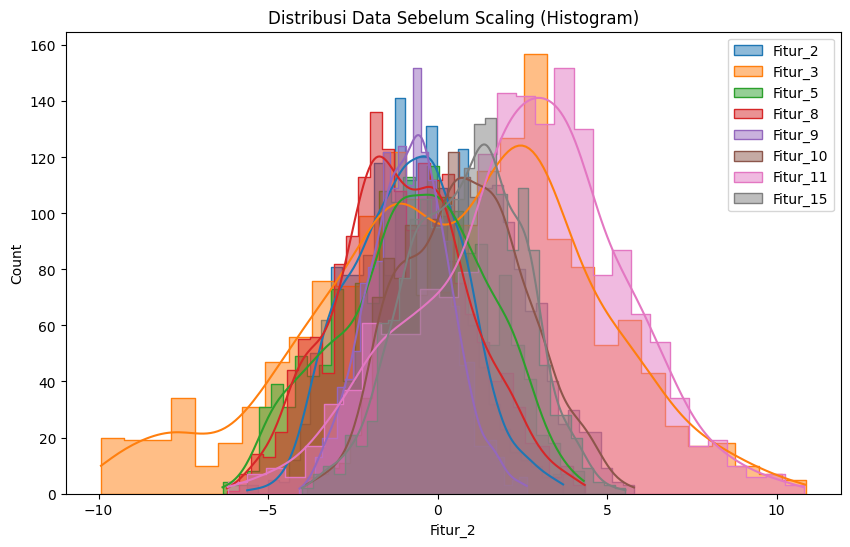

In [36]:
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Sebelum Scaling (Histogram)')
plt.legend()
plt.show()

In [38]:
scaler = StandardScaler()

X_resampled[important_features] = scaler.fit_transform(X_resampled[important_features])

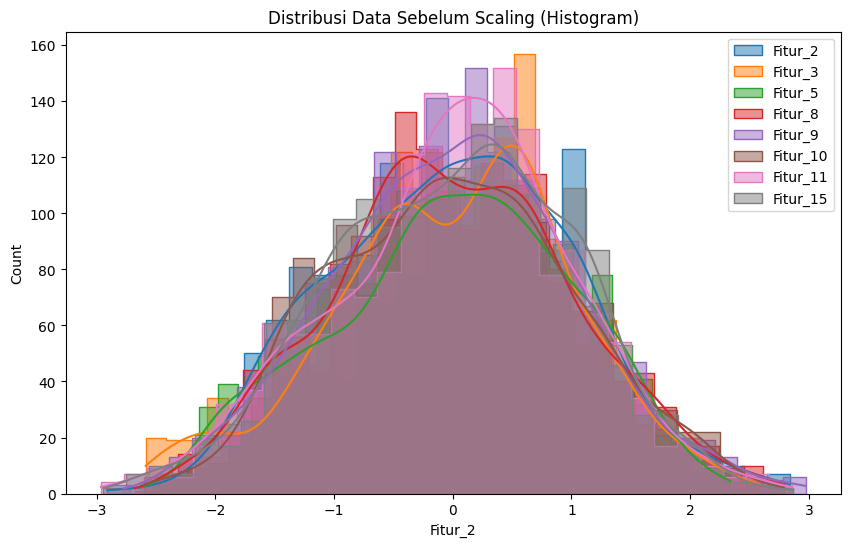

In [ ]:
plt.figure(figsize=(10, 6))
for col in X_resampled.columns:
    sns.histplot(X_resampled[col], kde=True, label=col, bins=30, element='step')
plt.title('Distribusi Data Setelah Scaling (Histogram)')
plt.legend()
plt.show()

In [40]:
X_resampled.describe(include='all')

,Fitur_2,Fitur_3,Fitur_5,Fitur_8,Fitur_9,Fitur_10,Fitur_11,Fitur_15
count,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03
mean,9.152190e-17,4.160086e-18,2.184045e-17,3.848080e-17,-4.576095e-17,1.664035e-17,-1.799237e-16,-1.040022e-17
std,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00,1.000293e+00
min,-2.910256e+00,-2.586039e+00,-2.636351e+00,-2.677288e+00,-2.773544e+00,-2.601203e+00,-2.962647e+00,-2.942073e+00
25%,-7.279931e-01,-6.239804e-01,-6.781122e-01,-6.736515e-01,-6.706434e-01,-7.731511e-01,-6.389414e-01,-7.351286e-01
50%,2.285102e-02,1.005549e-01,5.034930e-02,-2.287708e-02,3.437617e-02,-1.950790e-02,8.087398e-02,5.678811e-02
75%,7.013150e-01,6.682914e-01,7.353094e-01,6.744795e-01,6.775212e-01,6.758058e-01,6.490723e-01,7.284031e-01
max,2.838857e+00,2.585896e+00,2.337500e+00,2.793255e+00,2.971793e+00,2.786665e+00,2.859322e+00,2.868101e+00
